# Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


# Loading the dataset and analysis

In [3]:
#Loading the dataset
data = pd.read_csv("/gdrive/My Drive/DASA/final_dataset_eur.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 34045


,Unnamed: 0,Crop,N_min,N_max,P_min,P_max,K_min,K_max,EUR/kg,Avg_Temp,Rainfall,Area,Production,Production_kg,Productivity,EUR/ha
0,0,Arcanut (Processed),79,100,28,40,79,140,4.563914,25.035417,554.92,72.0,101.0,101000.0,1402.777778,6402.156527
1,1,Arcanut (Processed),79,100,28,40,79,140,4.563914,25.423750,518.68,14226.0,17450.0,17450000.0,1226.627302,5598.220982
2,2,Arcanut (Processed),79,100,28,40,79,140,4.563914,24.591250,808.48,679.0,482.0,482000.0,709.867452,3239.773693
3,3,Arcanut (Processed),79,100,28,40,79,140,4.563914,25.059167,609.18,804.0,1124.0,1124000.0,1398.009950,6380.396575
4,4,Arcanut (Processed),79,100,28,40,79,140,4.563914,23.631250,936.40,3171.0,3098.0,3098000.0,976.978871,4458.847121


In [4]:
data_bellissimo = data.copy()

In [5]:
df = data.drop(columns = ["Unnamed: 0", "Area", "Production", "EUR/kg", "Production_kg"])

In [6]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34045 entries, 0 to 34044
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crop          34045 non-null  object 
 1   N_min         34045 non-null  int64  
 2   N_max         34045 non-null  int64  
 3   P_min         34045 non-null  int64  
 4   P_max         34045 non-null  int64  
 5   K_min         34045 non-null  int64  
 6   K_max         34045 non-null  int64  
 7   Avg_Temp      34045 non-null  float64
 8   Rainfall      34045 non-null  float64
 9   Productivity  34045 non-null  float64
 10  EUR/ha        34045 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.9+ MB


In [7]:
df.describe()

,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha
count,34045.000000,34045.000000,34045.000000,34045.000000,34045.000000,34045.000000,34045.000000,34045.000000,3.404500e+04,3.404500e+04
mean,69.227552,165.661859,47.969717,77.668057,70.755118,165.102893,25.900823,1294.713588,3.447570e+04,9.530145e+03
std,55.156854,122.328795,21.609797,42.231579,66.871442,152.647868,1.911187,831.322287,1.281681e+06,2.340961e+05
min,8.000000,10.000000,0.000000,8.000000,0.000000,20.000000,-1.789167,34.240000,0.000000e+00,0.000000e+00
25%,25.000000,60.000000,28.000000,45.000000,30.000000,60.000000,25.178750,774.530000,7.352941e+02,1.081848e+03
50%,60.000000,120.000000,48.000000,70.000000,60.000000,120.000000,26.035833,1045.740000,2.764706e+03,2.640048e+03
75%,105.000000,303.000000,60.000000,95.000000,75.000000,220.000000,26.794583,1502.190000,1.265385e+04,6.815623e+03
max,250.000000,700.000000,112.000000,250.000000,515.000000,700.000000,29.852083,6579.720000,8.800000e+07,1.606498e+07


In [8]:
print("The total number of crops is:\n{}".format(df["Crop"].nunique()))

The total number of crops is:
89


In [9]:
distinct_crops = df["Crop"].value_counts()
print("The distribution for each crop is:\n{}".format(distinct_crops))

The distribution for each crop is:
Sugarcane            4176
Onion                2892
Potato               2713
Dry chillies         2606
Turmeric             2290
                     ... 
Carrot                  3
Litchi                  2
Peas  (vegetable)       2
Pear                    2
Plums                   1
Name: Crop, Length: 89, dtype: int64


In [10]:
crops = pd.DataFrame(distinct_crops)

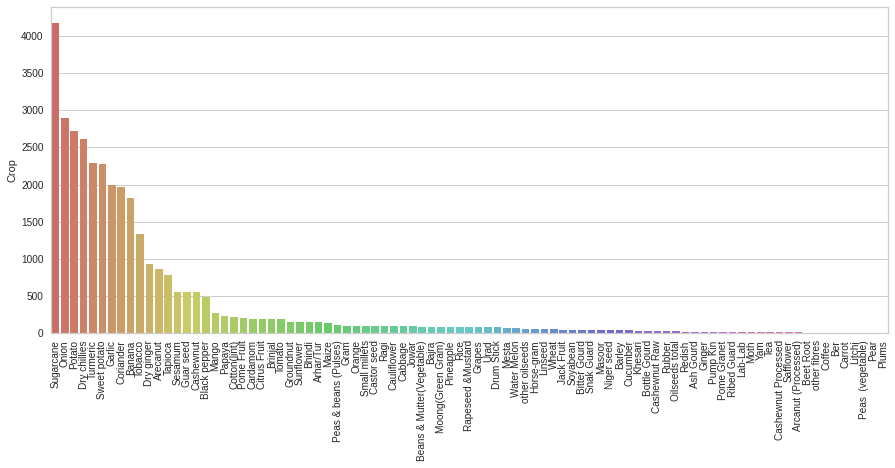

In [11]:
plt.figure(figsize = (15, 6))
sns.barplot(y ='Crop', x = crops.index, data = crops, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

Reletive Plot of All the Features


<Figure size 576x396 with 0 Axes>

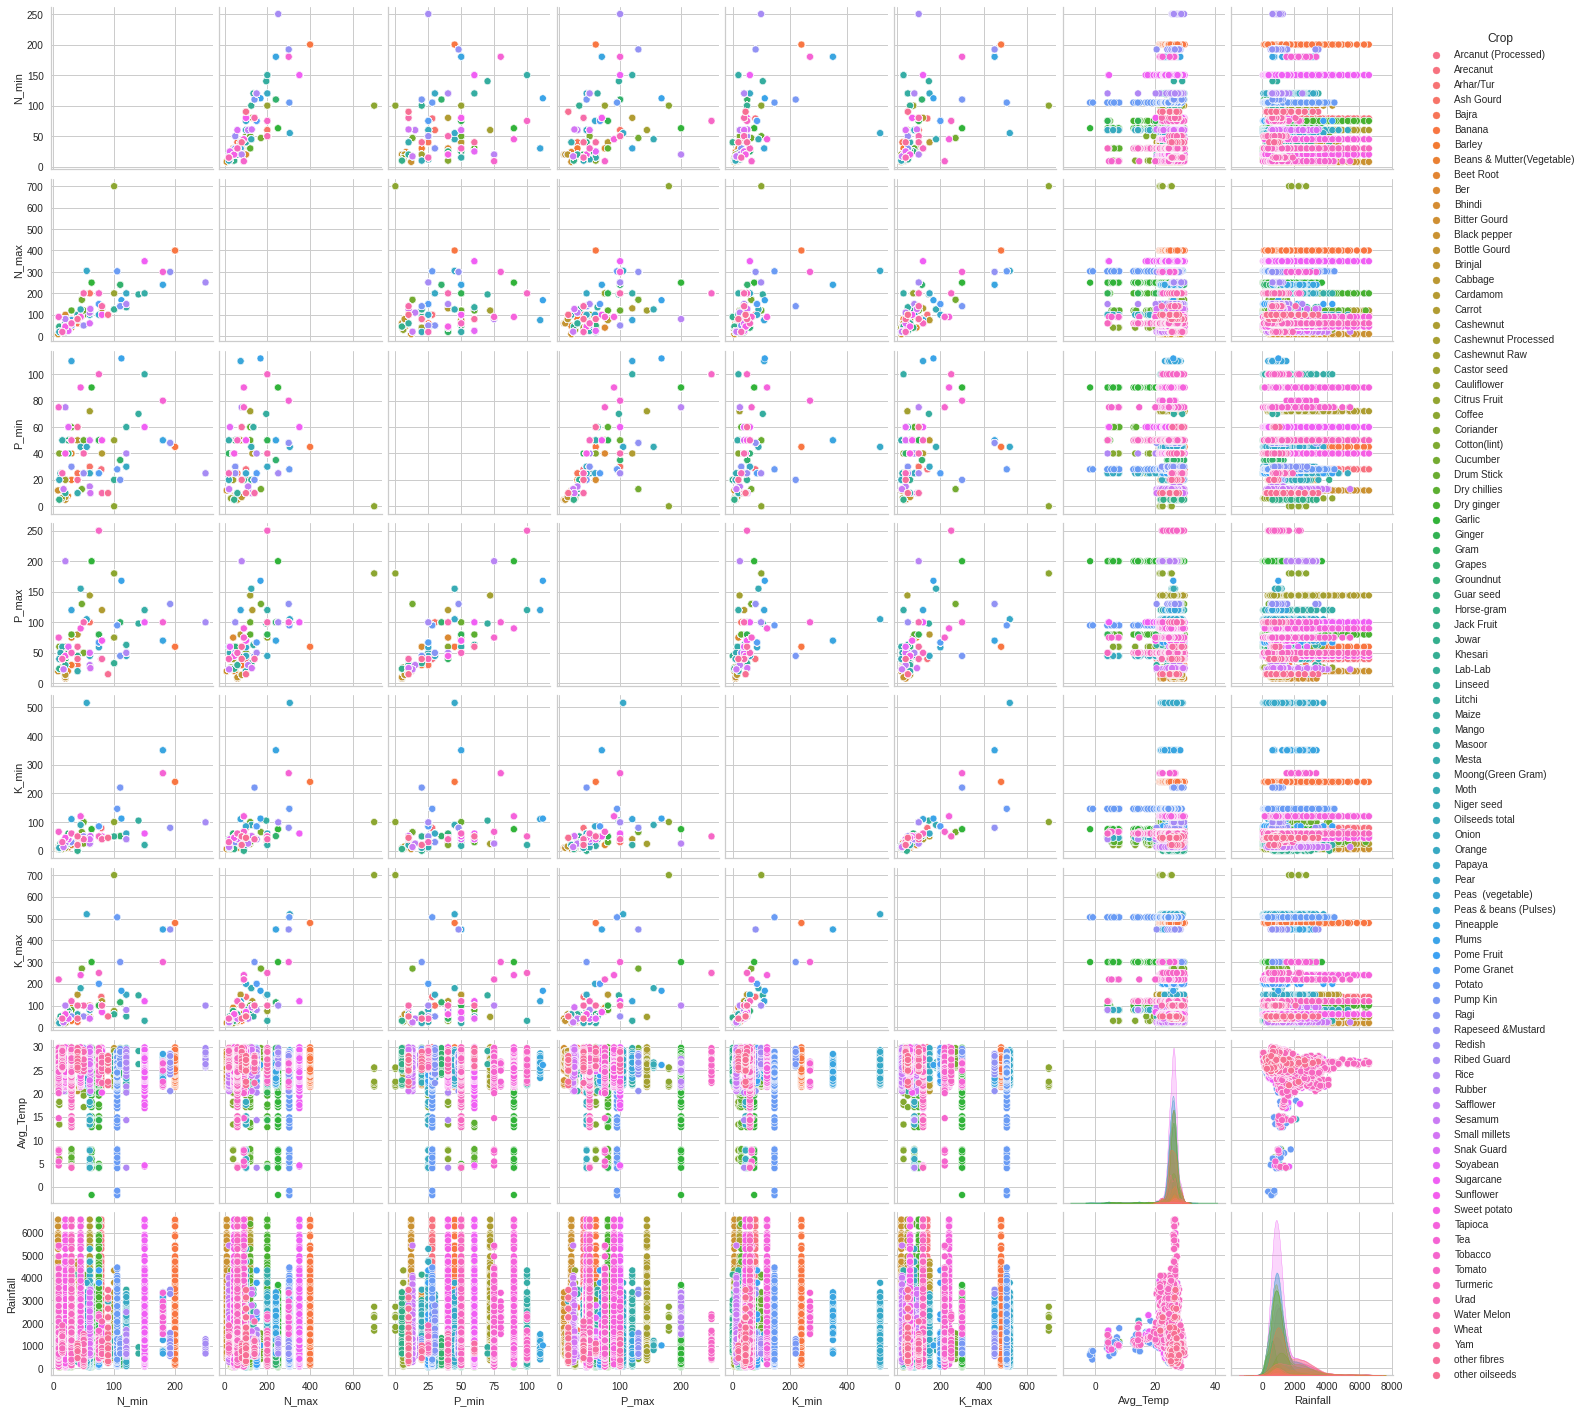

In [12]:
To_Plot = ["N_min", "N_max", "P_min", "P_max", "K_min", "K_max", "Avg_Temp", "Rainfall", "Crop"]
print("Reletive Plot of All the Features")
plt.figure()
sns.pairplot(df[To_Plot], hue = "Crop")
plt.show()

<Figure size 576x396 with 0 Axes>

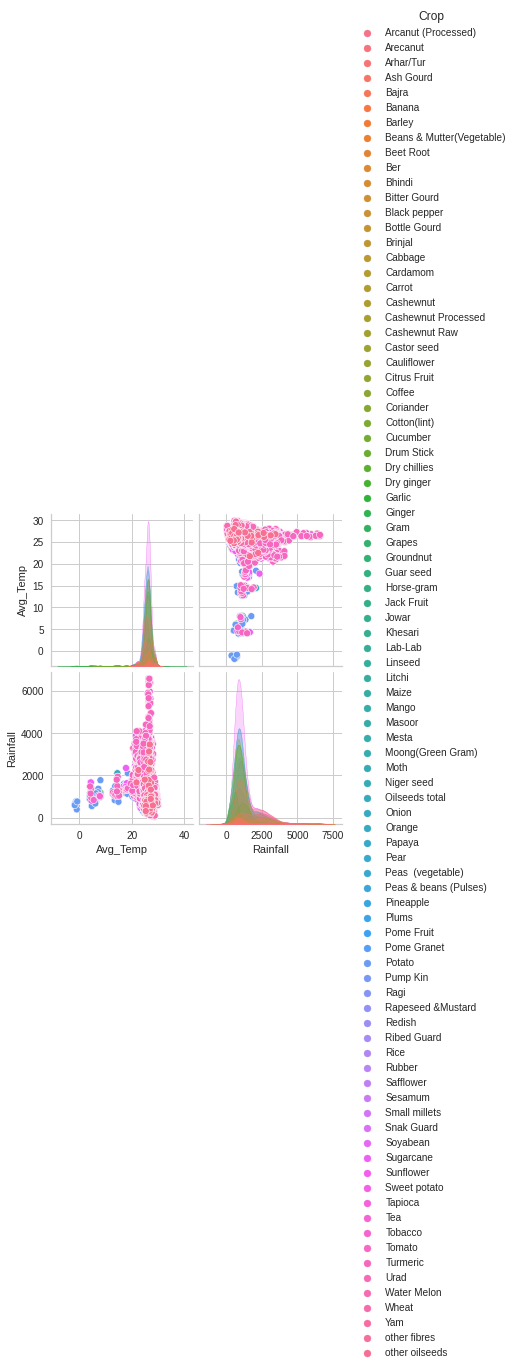

In [13]:
To_Plot = ["Avg_Temp", "Rainfall", "Crop"]
plt.figure()
sns.pairplot(df[To_Plot], hue = "Crop")
plt.show()

In [14]:
major_data = df[df["Avg_Temp"] > 12]
len(major_data)

33947

In [15]:
little_set = df[(df["Avg_Temp"] < 9) & (df["Avg_Temp"] > 3)]
len(little_set)

91

In [16]:
possible_outliers = df[df["Avg_Temp"] < 0]
len(possible_outliers)

7

In [17]:
from numpy.ma.extras import median

pivot_median = pd.pivot_table(df, index = ["Crop"], aggfunc = median)
pivot_median.sort_values(by = "Avg_Temp", ascending = False)

,Avg_Temp,EUR/ha,K_max,K_min,N_max,N_min,P_max,P_min,Productivity,Rainfall
Crop,,,,,,,,,,
Yam,28.758542,0.000000,100,50,80,40,60,60,0.000000,866.565
Pump Kin,28.656042,0.000000,300,220,140,110,45,20,0.000000,912.030
Redish,28.606250,0.000000,50,50,50,50,100,25,0.000000,908.670
Ber,28.596458,0.000000,90,20,40,30,75,40,0.000000,1069.250
Ash Gourd,28.586667,0.000000,100,30,200,60,100,30,0.000000,915.390
...,...,...,...,...,...,...,...,...,...,...
Cashewnut Processed,25.277083,1038.520607,48,24,120,60,144,72,101.133535,747.055
Arcanut (Processed),25.211250,6380.396575,140,79,100,79,40,28,1398.009950,744.980
Pineapple,24.849792,4332.639139,450,350,240,180,70,50,12249.360197,2205.935


In [18]:
import plotly.graph_objects as go

In [19]:
def percentile_rainfall(df):
  i = 'Rainfall'

  unique_crops = df['Crop'].unique()

  _out_upp = pd.DataFrame()
  _out_low = pd.DataFrame()

  _temp_out_upp = pd.DataFrame()
  _temp_out_low = pd.DataFrame()

  local_outlier = pd.DataFrame()
  outliers = pd.DataFrame()

  final_df = pd.DataFrame(columns = ['Crop', 'Total_rows', 'Upper_out', 'Lower_out'])

  for j in range(len(unique_crops)):

    crop = df
    crop = df[ df['Crop'] == unique_crops[j] ]

    Q1 = np.percentile(crop['Rainfall'], 25, interpolation = 'midpoint')

    Q3 = np.percentile(crop['Rainfall'], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    low_df = crop[crop['Rainfall'] < lower_bound].groupby('Rainfall').agg({"Crop" : pd.Series.value_counts})
    upp_df = crop[crop['Rainfall'] > upper_bound].groupby('Rainfall').agg({"Crop" : pd.Series.value_counts})

    lowers_df = crop[crop['Rainfall'] < lower_bound]
    uppers_df = crop[crop['Rainfall'] > upper_bound]

    lowers = lowers_df["Crop"].tolist()
    uppers = uppers_df["Crop"].tolist()

    crop_uppers = { i : uppers.count(i) for i in uppers }
    crop_lowers = { i : lowers.count(i) for i in lowers }

    row = {'Crop' : unique_crops[j], 'Total_rows' : len(df[df['Crop'] == unique_crops[j]]), 'Upper_out' : len(uppers) , 'Lower_out' : len(lowers)}
    final_df = final_df.append(row, ignore_index=True)
  
  fig = go.Figure()
  fig.add_trace(go.Bar(x=final_df["Crop"],y = final_df['Total_rows'],name = 'Total_rows',marker_color = 'red'))
  fig.add_trace(go.Bar(x=final_df["Crop"],y = final_df['Upper_out'],name = 'Upper_outliers',marker_color = 'green'))
  fig.add_trace(go.Bar(x=final_df["Crop"],y = final_df['Lower_out'],name = 'Lower_outliers',marker_color = 'blue'))
  fig.update_layout(plot_bgcolor = 'white', 
  barmode='group', 
  xaxis_tickangle = -45)
  fig.show()

In [20]:
percentile_rainfall(df)

In [21]:
def percentile_temperature(df):

  i = 'Avg_Temp'

  unique_crops = df['Crop'].unique()

  _out_upp = pd.DataFrame()
  _out_low = pd.DataFrame()

  _temp_out_upp = pd.DataFrame()
  _temp_out_low = pd.DataFrame()

  local_outlier = pd.DataFrame()
  outliers = pd.DataFrame()

  final_df = pd.DataFrame(columns = ['Crop', 'Total_rows','Upper_out','Lower_out'])


  for j in range(len(unique_crops)):

    crop = df
    crop = df[ df['Crop'] == unique_crops[j] ]

    #print("{} \n\n".format(unique_crops[j]))

    Q1=np.percentile(crop['Avg_Temp'],25,interpolation='midpoint')

    Q3=np.percentile(crop['Avg_Temp'],75,interpolation='midpoint')

    IQR = Q3-Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    low_df = crop[crop['Avg_Temp']<lower_bound].groupby('Avg_Temp').agg({ "Crop" : pd.Series.value_counts } )
    upp_df = crop[crop['Avg_Temp']>upper_bound].groupby('Avg_Temp').agg({ "Crop" : pd.Series.value_counts } )

    lowers_df = crop[crop['Avg_Temp'] < lower_bound]
    uppers_df = crop[crop['Avg_Temp'] > upper_bound]

    lowers = lowers_df["Crop"].tolist()
    uppers = uppers_df["Crop"].tolist()

    crop_uppers = { i : uppers.count(i) for i in uppers }
    crop_lowers = { i : lowers.count(i) for i in lowers }

    row = {'Crop' : unique_crops[j], 'Total_rows' : len(df[df['Crop'] == unique_crops[j]]), 'Upper_out' : len(uppers) , 'Lower_out' : len(lowers)}
    final_df = final_df.append(row, ignore_index=True)

  fig = go.Figure()
  fig.add_trace(go.Bar(x=final_df["Crop"],y=final_df['Total_rows'],name='Total_rows',marker_color='red'))
  fig.add_trace(go.Bar(x=final_df["Crop"],y=final_df['Upper_out'],name='Upper_outliers',marker_color='green'))
  fig.add_trace(go.Bar(x=final_df["Crop"],y=final_df['Lower_out'],name='Lower_outliers',marker_color='blue'))
  fig.update_layout(plot_bgcolor = 'white', 
  barmode = 'group', 
  xaxis_tickangle = -45)
  fig.show()


In [22]:
percentile_temperature(df)

# Taking off the outliers

In [23]:
def takeoff_outliers(df, features, y):

  outliers = pd.DataFrame()
  final = pd.DataFrame()
  uniques = df[y].unique()
  final = df

  for j in uniques:
    for i in features:

      tmp = df[df[y] == j ]

      Q1=np.percentile(tmp[i],25,interpolation = 'midpoint')
      Q3=np.percentile(tmp[i],75,interpolation = 'midpoint')

      IQR = Q3 - Q1

      upper_bound = Q3 + 1.5 * IQR
      lower_bound = Q1 - 1.5 * IQR

      outside = tmp[(tmp[i] < lower_bound) | (tmp[i] > upper_bound)]
      inside = tmp[(tmp[i] > lower_bound) & (tmp[i] < upper_bound)]

      outliers = outliers.append(outside, ignore_index = False )
      final = final.drop(outside.index, errors = 'ignore' )

       
  return outliers,final

In [24]:
features = ["Avg_Temp", "Rainfall"]
y = "Crop"

In [25]:
outliers, final = takeoff_outliers(df, features, y)
final

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha
0,Arcanut (Processed),79,100,28,40,79,140,25.035417,554.92,1402.777778,6402.156527
1,Arcanut (Processed),79,100,28,40,79,140,25.423750,518.68,1226.627302,5598.220982
2,Arcanut (Processed),79,100,28,40,79,140,24.591250,808.48,709.867452,3239.773693
3,Arcanut (Processed),79,100,28,40,79,140,25.059167,609.18,1398.009950,6380.396575
4,Arcanut (Processed),79,100,28,40,79,140,23.631250,936.40,976.978871,4458.847121
...,...,...,...,...,...,...,...,...,...,...,...
34040,other oilseeds,90,100,10,15,45,50,27.330417,815.89,500.000000,855.733794
34041,other oilseeds,90,100,10,15,45,50,27.190833,1323.06,500.000000,855.733794
34042,other oilseeds,90,100,10,15,45,50,27.066250,2632.85,500.000000,855.733794
34043,other oilseeds,90,100,10,15,45,50,27.972083,575.07,500.000000,855.733794


In [29]:
outliers

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha
8,Arcanut (Processed),79,100,28,40,79,140,22.254167,2174.61,1398.648649,6383.311539
8,Arcanut (Processed),79,100,28,40,79,140,22.254167,2174.61,1398.648649,6383.311539
10,Arcanut (Processed),79,100,28,40,79,140,26.240833,3780.67,1783.975659,8141.910709
449,Arecanut,79,100,28,40,79,140,21.620000,1932.14,989.247312,5079.194128
450,Arecanut,79,100,28,40,79,140,21.750833,2386.75,1033.405758,5305.921375
...,...,...,...,...,...,...,...,...,...,...,...
33982,other fibres,40,80,20,40,20,40,27.787500,447.01,0.000000,0.000000
33984,other fibres,40,80,20,40,20,40,27.284167,1002.14,0.000000,0.000000
34029,other oilseeds,90,100,10,15,45,50,21.743333,1663.60,0.000000,0.000000
34039,other oilseeds,90,100,10,15,45,50,22.493333,2252.26,0.000000,0.000000


In [30]:
original_data = df
df = final
df

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha
0,Arcanut (Processed),79,100,28,40,79,140,25.035417,554.92,1402.777778,6402.156527
1,Arcanut (Processed),79,100,28,40,79,140,25.423750,518.68,1226.627302,5598.220982
2,Arcanut (Processed),79,100,28,40,79,140,24.591250,808.48,709.867452,3239.773693
3,Arcanut (Processed),79,100,28,40,79,140,25.059167,609.18,1398.009950,6380.396575
4,Arcanut (Processed),79,100,28,40,79,140,23.631250,936.40,976.978871,4458.847121
...,...,...,...,...,...,...,...,...,...,...,...
34040,other oilseeds,90,100,10,15,45,50,27.330417,815.89,500.000000,855.733794
34041,other oilseeds,90,100,10,15,45,50,27.190833,1323.06,500.000000,855.733794
34042,other oilseeds,90,100,10,15,45,50,27.066250,2632.85,500.000000,855.733794
34043,other oilseeds,90,100,10,15,45,50,27.972083,575.07,500.000000,855.733794


In [31]:
n = (final["Crop"].value_counts() > 40)
print("The crops having more than 70 rows are:\n{}".format(sum(n)))

The crops having more than 70 rows are:
60


In [32]:
m = (final["Crop"].value_counts() < 40)
print("The crops having less than 70 rows are:\n{}".format(sum(m)))

The crops having less than 70 rows are:
26


In [33]:
n = n.to_frame()
n.index.name = "Name"
n.reset_index(level = ["Name"], inplace = True)
only = n[n["Crop"] == True]
only = only["Name"].tolist()
only

['Sugarcane',
 'Onion',
 'Potato',
 'Dry chillies',
 'Turmeric',
 'Sweet potato',
 'Garlic',
 'Coriander',
 'Banana',
 'Tobacco',
 'Dry ginger',
 'Arecanut',
 'Tapioca',
 'Guar seed',
 'Cashewnut',
 'Sesamum',
 'Black pepper',
 'Mango',
 'Papaya',
 'Cotton(lint)',
 'Cardamom',
 'Pome Fruit',
 'Citrus Fruit',
 'Tomato',
 'Brinjal',
 'Sunflower',
 'Groundnut',
 'Arhar/Tur',
 'Bhindi',
 'Maize',
 'Peas & beans (Pulses)',
 'Orange',
 'Gram',
 'Castor seed',
 'Small millets',
 'Cauliflower',
 'Ragi',
 'Jowar',
 'Cabbage',
 'Moong(Green Gram)',
 'Bajra',
 'Pineapple',
 'Beans & Mutter(Vegetable)',
 'Urad',
 'Rapeseed &Mustard',
 'Grapes',
 'Drum Stick',
 'Mesta',
 'Rice',
 'Water Melon',
 'Horse-gram',
 'other oilseeds',
 'Wheat',
 'Linseed',
 'Jack Fruit',
 'Bitter Gourd',
 'Snak Guard',
 'Niger seed',
 'Masoor',
 'Soyabean']

In [34]:
all_crops_df = df
data = df[df["Crop"].isin(only) ]
data

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha
11,Arecanut,79,100,28,40,79,140,28.236667,1189.48,2750.000000,14119.607590
12,Arecanut,79,100,28,40,79,140,28.294583,887.11,1750.000000,8985.204830
13,Arecanut,79,100,28,40,79,140,28.545833,788.69,1444.444444,7416.359542
14,Arecanut,79,100,28,40,79,140,28.487500,805.96,722.222222,3708.179771
15,Arecanut,79,100,28,40,79,140,28.289167,1822.37,444.444444,2281.956782
...,...,...,...,...,...,...,...,...,...,...,...
34040,other oilseeds,90,100,10,15,45,50,27.330417,815.89,500.000000,855.733794
34041,other oilseeds,90,100,10,15,45,50,27.190833,1323.06,500.000000,855.733794
34042,other oilseeds,90,100,10,15,45,50,27.066250,2632.85,500.000000,855.733794
34043,other oilseeds,90,100,10,15,45,50,27.972083,575.07,500.000000,855.733794


In [35]:
new_df = pd.merge(data, data_bellissimo, on = ["Crop", "N_min",	"N_max",	"P_min",	"P_max", "K_min",	"K_max", "Avg_Temp", "Rainfall", "Productivity"])
new_df

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha_x,Unnamed: 0,EUR/kg,Area,Production,Production_kg,EUR/ha_y
0,Arecanut,79,100,28,40,79,140,28.236667,1189.48,2750.000000,14119.607590,11,5.134403,4.0,11.0,11000.0,14119.607590
1,Arecanut,79,100,28,40,79,140,28.294583,887.11,1750.000000,8985.204830,12,5.134403,4.0,7.0,7000.0,8985.204830
2,Arecanut,79,100,28,40,79,140,28.545833,788.69,1444.444444,7416.359542,13,5.134403,18.0,26.0,26000.0,7416.359542
3,Arecanut,79,100,28,40,79,140,28.487500,805.96,722.222222,3708.179771,14,5.134403,18.0,13.0,13000.0,3708.179771
4,Arecanut,79,100,28,40,79,140,28.289167,1822.37,444.444444,2281.956782,15,5.134403,9.0,4.0,4000.0,2281.956782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30627,other oilseeds,90,100,10,15,45,50,27.330417,815.89,500.000000,855.733794,34040,1.711468,1600.0,800.0,800000.0,855.733794
30628,other oilseeds,90,100,10,15,45,50,27.190833,1323.06,500.000000,855.733794,34041,1.711468,800.0,400.0,400000.0,855.733794
30629,other oilseeds,90,100,10,15,45,50,27.066250,2632.85,500.000000,855.733794,34042,1.711468,200.0,100.0,100000.0,855.733794
30630,other oilseeds,90,100,10,15,45,50,27.972083,575.07,500.000000,855.733794,34043,1.711468,200.0,100.0,100000.0,855.733794


In [36]:
new_new_df = new_df.copy()
new_new_df = new_new_df.drop(columns = ["Unnamed: 0", "EUR/ha_y"])
new_new_df = new_new_df.rename(columns = {"EUR/ha_x" : "EUR/ha"})
new_new_df

,Crop,N_min,N_max,P_min,P_max,K_min,K_max,Avg_Temp,Rainfall,Productivity,EUR/ha,EUR/kg,Area,Production,Production_kg
0,Arecanut,79,100,28,40,79,140,28.236667,1189.48,2750.000000,14119.607590,5.134403,4.0,11.0,11000.0
1,Arecanut,79,100,28,40,79,140,28.294583,887.11,1750.000000,8985.204830,5.134403,4.0,7.0,7000.0
2,Arecanut,79,100,28,40,79,140,28.545833,788.69,1444.444444,7416.359542,5.134403,18.0,26.0,26000.0
3,Arecanut,79,100,28,40,79,140,28.487500,805.96,722.222222,3708.179771,5.134403,18.0,13.0,13000.0
4,Arecanut,79,100,28,40,79,140,28.289167,1822.37,444.444444,2281.956782,5.134403,9.0,4.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30627,other oilseeds,90,100,10,15,45,50,27.330417,815.89,500.000000,855.733794,1.711468,1600.0,800.0,800000.0
30628,other oilseeds,90,100,10,15,45,50,27.190833,1323.06,500.000000,855.733794,1.711468,800.0,400.0,400000.0
30629,other oilseeds,90,100,10,15,45,50,27.066250,2632.85,500.000000,855.733794,1.711468,200.0,100.0,100000.0
30630,other oilseeds,90,100,10,15,45,50,27.972083,575.07,500.000000,855.733794,1.711468,200.0,100.0,100000.0


Reletive Plot of All the Features


<Figure size 576x396 with 0 Axes>

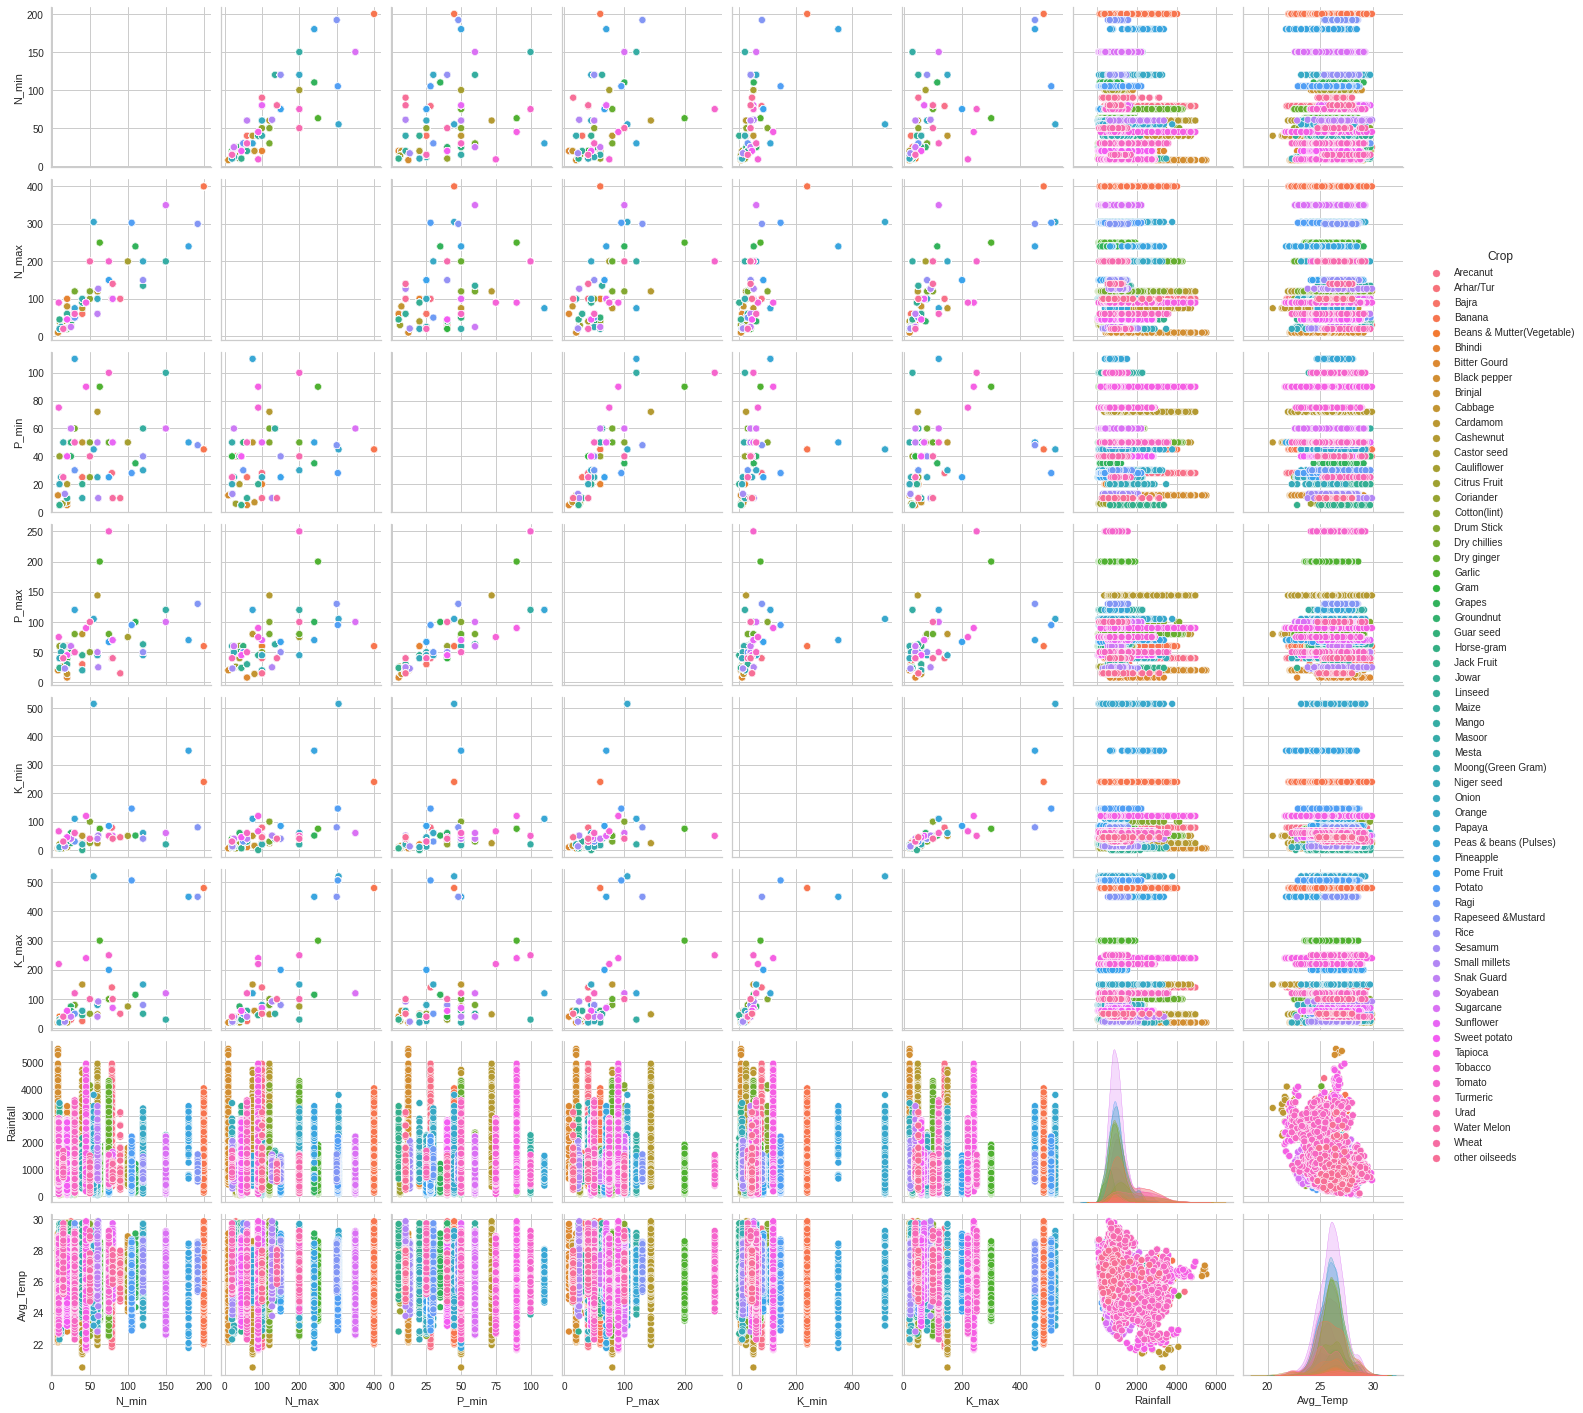

In [43]:
print("Reletive Plot of All the Features")
plt.figure()
sns.pairplot(new_new_df[["N_min","N_max","P_min","P_max","K_min","K_max","Rainfall","Avg_Temp","Crop"]], hue = "Crop")
plt.show()

Reletive Plot of All the Features


<Figure size 576x396 with 0 Axes>

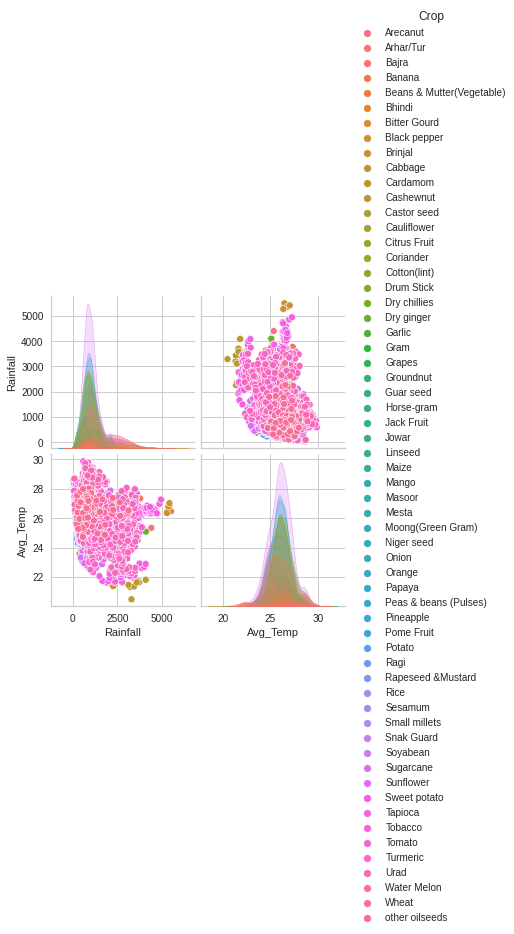

In [41]:
print("Reletive Plot of All the Features")
plt.figure()
sns.pairplot(new_new_df[["Rainfall","Avg_Temp","Crop"]], hue = "Crop")
plt.show()

In [ ]:
#new_new_df.to_csv("/gdrive/My Drive/DASA/final_dataset_eur_without_outliers.csv", index = True)